# <span style="color:red">Calories Burnt Prediction</span>


# <span style="background-color: #FFE4B5; padding: 10px"><strong>**IMPORTING LIBRARIES:**</strong></span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# <span style="background-color: #FFE4B5; padding: 10px"><strong>**LOADING DATASET:**</strong></span>

In [2]:
# loading the data from csv file to a Pandas DataFrame
calories = pd.read_csv('calories.csv')

In [3]:
# print the first 5 rows of the dataframe
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:
exercise_data = pd.read_csv('exercise.csv')

In [5]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [6]:
# Combining the two Dataframes
df = pd.concat([exercise_data, calories['Calories']], axis=1)

In [7]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


# <span style="background-color: #FFE4B5; padding: 10px"><strong>**BACIS UNDERSTATNDING OF DATASET:**</strong></span>

### 1. Checking the Dimensions of Dataset.

In [8]:
print("Total Number of records/ rows present in the dataset is: ", df.shape[0])
print("Total Number of columns present in the dataset is: ", df.shape[1])

Total Number of records/ rows present in the dataset is:  15000
Total Number of columns present in the dataset is:  9


### 2. Fetching the attributes Name

In [9]:
df.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

### 3. Generating Basic Information of the data.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


### **Observations**:
Dataset contains 15000 rows and 9 columns.

Out of 15 , 6 columns are of float datatype, 2 are of int, 1 are of object datatype.

### 4. Checking for null values

In [11]:
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

### **Observations:**
    There are not null values present in our dataset.

### 5. Checking for Duplicates

In [12]:
df.duplicated().sum()

0

### **Observation:**
There is no duplicate records present in our dataset

### 7. Basic statistical information about dataset

In [13]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [14]:

df['BMI'] = round(df['Weight'] / ((df['Height'] / 100) ** 2), 1)


In [15]:
df.head()


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0,26.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0,21.8
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0,24.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0,22.2
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0,24.5


# <span style="background-color: #FFE4B5; padding: 10px"><strong>**EXPLORATORY DATA ANALYSIS:**</strong></span>

# 1. What is the distribution of the target variable 'Calories'? Is it skewed?

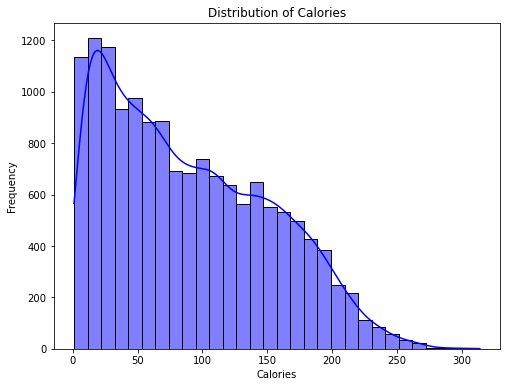

In [16]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Calories'], bins=30, kde=True, color='blue')
plt.title('Distribution of Calories')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()

### **Observation**
By observing the above plot, we can conclude that the 'Calories' column is right-skewed as it contains some outliers. However, we have decided not to remove them because there is a possibility that people who exercise more burn a higher number of calories. Therefore, we are retaining the outliers as they may provide valuable information about higher calorie expenditure during intense exercise sessions.

# 2. How does the distribution of calories burned vary between different genders?

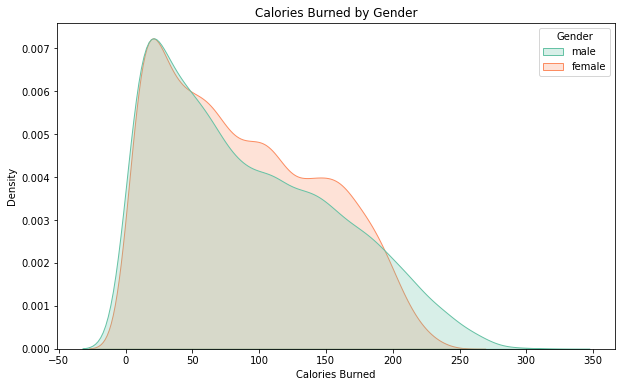

In [17]:

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Calories', hue='Gender', fill=True, common_norm=False, palette='Set2')
plt.title('Calories Burned by Gender')
plt.xlabel('Calories Burned')
plt.ylabel('Density')
plt.show()


### **Observation**
By observing the above KDE chart, we can say that calories burned among males and females are almost the same, but both are slightly right-skewed.

# 3. How does the distribution change across different age?

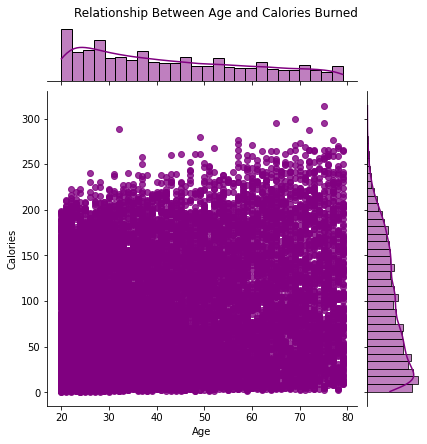

In [18]:


sns.jointplot(data=df, x='Age', y='Calories', kind='reg', color='purple')
plt.suptitle('Relationship Between Age and Calories Burned', y=1.02)
plt.show()


# 4.  Is there a clear relationship between the duration of the activity and the calories burned?

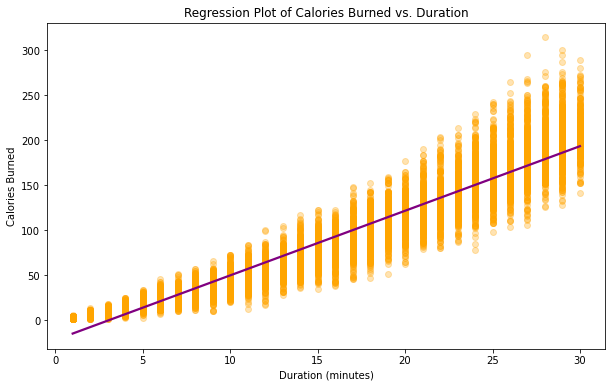

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Duration', y='Calories', scatter_kws={'alpha': 0.3, 'color': 'orange'}, line_kws={'color': 'purple'})
plt.title('Regression Plot of Calories Burned vs. Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Calories Burned')
plt.show()



### **Observation::**
        From the above regression plot, it is clear that the duration of the activity and the calories burned are positively correlated. As the duration of the activity increases, the number of calories burned also increases.

# 5. How does heart rate correlate with the number of calories burned during physical activities?

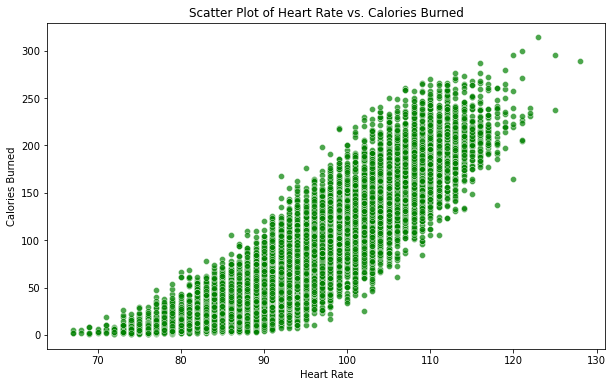

In [20]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Heart_Rate', y='Calories', alpha=0.7, color='green')
plt.title('Scatter Plot of Heart Rate vs. Calories Burned')
plt.xlabel('Heart Rate')
plt.ylabel('Calories Burned')
plt.show()


# **Observation:**
    By observing the above chart, it is evident that as heart rate increases, the rate of calories burned also increases.
    This could be attributed to the possibility that, during more intensive exercises, such as running, the heart rate is higher, resulting in a greater calorie expenditure. Conversely, when engaging in low-intensity activities like walking, the heart rate is lower, and calories burned are also lower.

# 6. How does BMI correlate with calories expended?

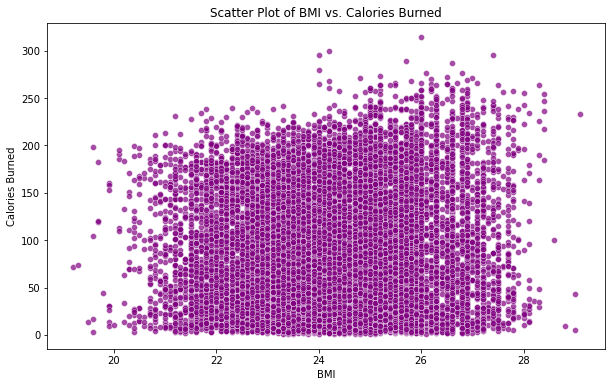

In [21]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='BMI', y='Calories', alpha=0.7, color='purple')
plt.title('Scatter Plot of BMI vs. Calories Burned')
plt.xlabel('BMI')
plt.ylabel('Calories Burned')
plt.show()



# 7. Is there any noticeable relationship between body temperature and calories burned?

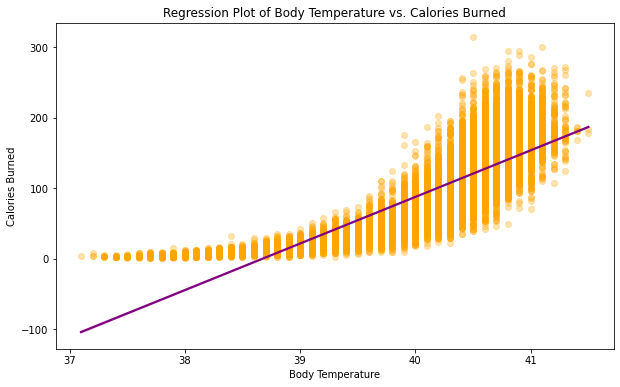

In [22]:


plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Body_Temp', y='Calories', scatter_kws={'alpha': 0.3, 'color': 'orange'}, line_kws={'color': 'purple'})
plt.title('Regression Plot of Body Temperature vs. Calories Burned')
plt.xlabel('Body Temperature')
plt.ylabel('Calories Burned')
plt.show()



### **Observation:**
    As body temperature increases, there is a corresponding rise in calories burned, potentially indicating a connection to the intensity of exercise.

# <span style="background-color: #FFE4B5; padding: 10px"><strong>**Converting Catergories to Numbers:**</strong></span>

In [23]:
df["Gender"].value_counts()

female    7553
male      7447
Name: Gender, dtype: int64

In [24]:
df["Gender"]= df["Gender"].map({"female": 0, "male": 1})

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  int64  
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
 9   BMI         15000 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 1.1 MB


# <span style="background-color: #FFE4B5; padding: 10px"><strong>**Corelation metrics:**</strong></span>

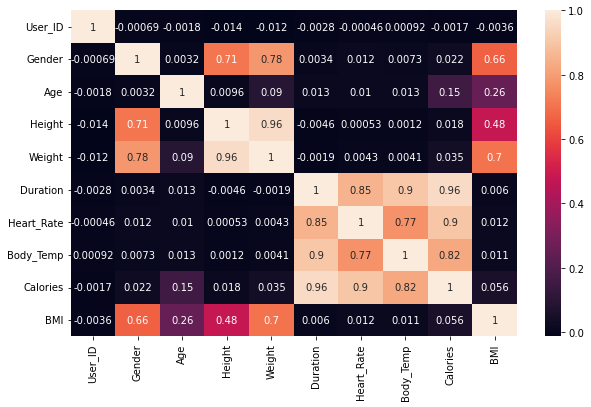

In [26]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot= True)
plt.show()

In [27]:
df.columns


Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories', 'BMI'],
      dtype='object')

# <span style="background-color: #FFE4B5; padding: 10px"><strong>**splitting the data into X and y:**</strong></span>

In [28]:
x= df.drop(["User_ID", "Height", "Weight"], axis= 1)

In [29]:
x.head()

,Gender,Age,Duration,Heart_Rate,Body_Temp,Calories,BMI
0,1,68,29.0,105.0,40.8,231.0,26.0
1,0,20,14.0,94.0,40.3,66.0,21.8
2,1,69,5.0,88.0,38.7,26.0,24.7
3,0,34,13.0,100.0,40.5,71.0,22.2
4,0,27,10.0,81.0,39.8,35.0,24.5


In [30]:
y = df["Calories"]

In [31]:
y.head()

0    231.0
1     66.0
2     26.0
3     71.0
4     35.0
Name: Calories, dtype: float64

#  <span style="background-color: #FFE4B5; padding: 10px"><strong>**Scaling:**</strong></span>

In [32]:
# applying 'for loop' to bring all the variables in rabge 0 to 1
for i in x.columns[:]:
    x[i]  = (x[i] - x[i].min()) / (x[i].max() - x[i].min())

In [33]:
x.head()

,Gender,Age,Duration,Heart_Rate,Body_Temp,Calories,BMI
0,1.0,0.813559,0.965517,0.622951,0.840909,0.734824,0.686869
1,0.0,0.000000,0.448276,0.442623,0.727273,0.207668,0.262626
2,1.0,0.830508,0.137931,0.344262,0.363636,0.079872,0.555556
3,0.0,0.237288,0.413793,0.540984,0.772727,0.223642,0.303030
4,0.0,0.118644,0.310345,0.229508,0.613636,0.108626,0.535354


#  <span style="background-color: #FFE4B5; padding: 10px"><strong>**Split Training and Testing data:**</strong></span>

In [34]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.30, random_state=123)

# <span style="background-color: #FFE4B5; padding: 10px"><strong>**Defining Architecture of the Neural Network:**</strong></span>

In [35]:
# important libraries
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import InputLayer, Dense
from sklearn.metrics import mean_absolute_error, r2_score

# <span style="background-color: #FFE4B5; padding: 10px"><strong>**Defining different layers in out model:**</strong></span>

In [36]:
# defining input neurons
input_neurons = xtrain.shape[1]
print(f'Number of input Neurons : {input_neurons}')

Number of input Neurons : 7


# <span style="background-color: #FFE4B5; padding: 10px"><strong>**Model Architecture:**</strong></span>

In [37]:
# Model 1
model1 = Sequential()
model1.add(InputLayer(input_shape= (input_neurons,))) #adding Layers
model1.add(Dense(8 ,activation='relu')) # set number of neurons using units
model1.add(Dense(1 ,activation='linear'))

In [38]:
# model 2
model2 = Sequential()
model2.add(InputLayer(input_shape= (input_neurons,)))
model2.add(Dense(8 ,activation='relu'))
model2.add(Dense(16 ,activation='relu'))
model2.add(Dense(1 ,activation='linear'))

In [39]:
# model 3
model3 = Sequential()
model3.add(InputLayer(input_shape= (input_neurons,)))
model3.add(Dense(20 ,activation='relu'))
model3.add(Dense(10 ,activation='relu'))
model3.add(Dense(1 ,activation='linear'))

In [40]:
# model 4
model4 = Sequential()
model4.add(InputLayer(input_shape= (input_neurons,)))
model4.add(Dense(20 ,activation='relu'))
model4.add(Dense(1 ,activation='linear'))

In [41]:
# model 5
model5 = Sequential()
model5.add(InputLayer(input_shape= (input_neurons,)))
model5.add(Dense(10 ,activation='relu'))
model5.add(Dense(20 ,activation='relu'))
model5.add(Dense(1 ,activation='linear'))

In [42]:
# model 1 summary
model1.summary()

print("#"*100)
print("#"*100)

# model 2 summary
model2.summary()

print("#"*100)
print("#"*100)

# model 3 summary
model3.summary()

print("#"*100)
print("#"*100)

# model 4 summary
model4.summary()
print("#"*100)
print("#"*100)

# model 5 summary
model5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 64        
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 73 (292.00 Byte)
Trainable params: 73 (292.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
####################################################################################################
####################################################################################################
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8)                 64   

# Compiling all Models (defining loss function, optimizer)

In [43]:
model1.compile(loss='mean_absolute_error',optimizer='Adam')


In [44]:
model2.compile(loss='mean_absolute_error',optimizer='Adam')

In [45]:
model3.compile(loss='mean_absolute_error',optimizer='Adam')

In [46]:
model4.compile(loss='mean_absolute_error',optimizer='Adam')

# Training Models

In [47]:
model1_history = model1.fit(xtrain, ytrain, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
263/263 [==============================] - 2s 4ms/step - loss: 88.3207 - val_loss: 89.8733
Epoch 2/50
263/263 [==============================] - 1s 3ms/step - loss: 86.4376 - val_loss: 87.3283
Epoch 3/50
263/263 [==============================] - 1s 3ms/step - loss: 83.2585 - val_loss: 83.4917
Epoch 4/50
263/263 [==============================] - 1s 3ms/step - loss: 78.9505 - val_loss: 78.7052
Epoch 5/50
263/263 [==============================] - 1s 4ms/step - loss: 73.8804 - val_loss: 73.3479
Epoch 6/50
263/263 [==============================] - 1s 3ms/step - loss: 68.4278 - val_loss: 67.7549
Epoch 7/50
263/263 [==============================] - 1s 3ms/step - loss: 62.8939 - val_loss: 62.1783
Epoch 8/50
263/263 [==============================] - 1s 3ms/step - loss: 57.4733 - val_loss: 56.8183
Epoch 9/50
263/263 [==============================] - 1s 3ms/step - loss: 52.3038 - val_loss: 51.5868
Epoch 10/50
263/263 [==============================] - 1s 3ms/step - loss: 47.3745

In [48]:
ypred1 = model1.predict(xtest)

141/141 [==============================] - 0s 2ms/step


In [49]:
ypred1_train= model1.predict(xtrain)

329/329 [==============================] - 1s 2ms/step


In [50]:
pred1= r2_score(ytest,ypred1)
print(pred1)

0.992167097210567


In [51]:
pred1= r2_score(ytrain,ypred1_train)
print(pred1)

0.9922466612554911


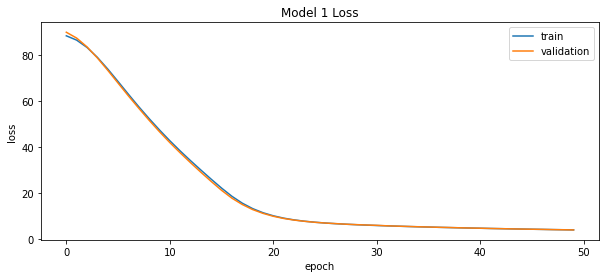

In [52]:
plt.figure(figsize=(10,4))
plt.plot(model1_history.history['loss'])
plt.plot(model1_history.history['val_loss'])   # validation loss values

plt.title('Model 1 Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper right')

plt.show()

In [53]:
model2_history = model2.fit(xtrain, ytrain, epochs=75, batch_size=64, validation_split=0.2)

Epoch 1/75
132/132 [==============================] - 2s 6ms/step - loss: 87.6498 - val_loss: 86.8317
Epoch 2/75
132/132 [==============================] - 0s 3ms/step - loss: 75.0013 - val_loss: 64.0474
Epoch 3/75
132/132 [==============================] - 0s 3ms/step - loss: 49.7272 - val_loss: 41.7963
Epoch 4/75
132/132 [==============================] - 0s 3ms/step - loss: 37.3181 - val_loss: 34.8163
Epoch 5/75
132/132 [==============================] - 0s 3ms/step - loss: 30.8766 - val_loss: 27.7597
Epoch 6/75
132/132 [==============================] - 0s 3ms/step - loss: 22.8087 - val_loss: 18.6522
Epoch 7/75
132/132 [==============================] - 0s 3ms/step - loss: 13.7397 - val_loss: 10.7210
Epoch 8/75
132/132 [==============================] - 0s 3ms/step - loss: 8.2499 - val_loss: 6.9999
Epoch 9/75
132/132 [==============================] - 0s 3ms/step - loss: 5.9924 - val_loss: 5.5727
Epoch 10/75
132/132 [==============================] - 0s 3ms/step - loss: 4.9941 - va

In [54]:
ypred2 = model2.predict(xtest)

141/141 [==============================] - 0s 2ms/step


In [55]:
ypred2_train= model2.predict(xtrain)

329/329 [==============================] - 1s 2ms/step


In [56]:
pred2= r2_score(ytest,ypred2)
print(pred2)

0.9996932840350081


In [57]:
pred2= r2_score(ytrain,ypred2_train)
print(pred2)

0.9997039357729528


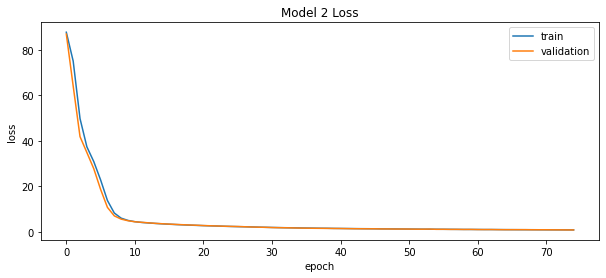

In [58]:
plt.figure(figsize=(10,4))
plt.plot(model2_history.history['loss'])
plt.plot(model2_history.history['val_loss'])   # validation loss values

plt.title('Model 2 Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper right')

plt.show()

In [59]:
model3_history = model3.fit(xtrain, ytrain, epochs=100, batch_size=64, validation_split=0.2)

Epoch 1/100
132/132 [==============================] - 2s 5ms/step - loss: 87.2150 - val_loss: 85.6785
Epoch 2/100
132/132 [==============================] - 0s 3ms/step - loss: 71.3063 - val_loss: 56.8091
Epoch 3/100
132/132 [==============================] - 0s 3ms/step - loss: 43.4987 - val_loss: 38.3162
Epoch 4/100
132/132 [==============================] - 0s 3ms/step - loss: 35.0456 - val_loss: 32.7240
Epoch 5/100
132/132 [==============================] - 0s 3ms/step - loss: 28.7572 - val_loss: 25.3387
Epoch 6/100
132/132 [==============================] - 0s 3ms/step - loss: 20.1926 - val_loss: 15.5695
Epoch 7/100
132/132 [==============================] - 0s 3ms/step - loss: 11.3240 - val_loss: 8.8162
Epoch 8/100
132/132 [==============================] - 0s 3ms/step - loss: 6.8983 - val_loss: 5.9891
Epoch 9/100
132/132 [==============================] - 0s 3ms/step - loss: 5.2842 - val_loss: 4.9904
Epoch 10/100
132/132 [==============================] - 0s 3ms/step - loss: 4.

132/132 [==============================] - 0s 3ms/step - loss: 0.6441 - val_loss: 0.6534
Epoch 82/100
132/132 [==============================] - 0s 3ms/step - loss: 0.6331 - val_loss: 0.6187
Epoch 83/100
132/132 [==============================] - 0s 3ms/step - loss: 0.6420 - val_loss: 0.6105
Epoch 84/100
132/132 [==============================] - 0s 3ms/step - loss: 0.6125 - val_loss: 0.5833
Epoch 85/100
132/132 [==============================] - 0s 3ms/step - loss: 0.6089 - val_loss: 0.5807
Epoch 86/100
132/132 [==============================] - 0s 3ms/step - loss: 0.6078 - val_loss: 0.5846
Epoch 87/100
132/132 [==============================] - 0s 3ms/step - loss: 0.5972 - val_loss: 0.5658
Epoch 88/100
132/132 [==============================] - 0s 3ms/step - loss: 0.5844 - val_loss: 0.5524
Epoch 89/100
132/132 [==============================] - 0s 3ms/step - loss: 0.5699 - val_loss: 0.5924
Epoch 90/100
132/132 [==============================] - 0s 3ms/step - loss: 0.5642 - val_loss: 

In [60]:
ypred3 = model3.predict(xtest)
ypred3_train= model3.predict(xtrain)

329/329 [==============================] - 1s 3ms/step


In [61]:
pred3= r2_score(ytest,ypred3)
print(pred3)

0.9999089620707547


In [62]:
pred3= r2_score(ytrain,ypred3_train)
print(pred3)

0.9999091275520584


In [63]:
model4_history = model4.fit(xtrain, ytrain, epochs=100, batch_size=64, validation_split=0.2)

Epoch 1/100
132/132 [==============================] - 2s 5ms/step - loss: 87.6861 - val_loss: 88.4507
Epoch 2/100
132/132 [==============================] - 1s 4ms/step - loss: 83.8059 - val_loss: 83.1911
Epoch 3/100
132/132 [==============================] - 0s 3ms/step - loss: 77.4669 - val_loss: 75.8017
Epoch 4/100
132/132 [==============================] - 1s 4ms/step - loss: 69.5221 - val_loss: 67.3911
Epoch 5/100
132/132 [==============================] - 1s 4ms/step - loss: 61.1663 - val_loss: 59.0916
Epoch 6/100
132/132 [==============================] - 0s 4ms/step - loss: 53.4562 - val_loss: 51.7535
Epoch 7/100
132/132 [==============================] - 0s 3ms/step - loss: 46.9749 - val_loss: 45.6650
Epoch 8/100
132/132 [==============================] - 0s 3ms/step - loss: 41.8451 - val_loss: 40.8674
Epoch 9/100
132/132 [==============================] - 0s 3ms/step - loss: 37.8005 - val_loss: 37.0178
Epoch 10/100
132/132 [==============================] - 0s 3ms/step - los

132/132 [==============================] - 0s 3ms/step - loss: 1.6547 - val_loss: 1.6510
Epoch 82/100
132/132 [==============================] - 0s 3ms/step - loss: 1.6047 - val_loss: 1.5958
Epoch 83/100
132/132 [==============================] - 0s 3ms/step - loss: 1.5521 - val_loss: 1.5462
Epoch 84/100
132/132 [==============================] - 0s 3ms/step - loss: 1.5040 - val_loss: 1.4941
Epoch 85/100
132/132 [==============================] - 0s 3ms/step - loss: 1.4610 - val_loss: 1.4633
Epoch 86/100
132/132 [==============================] - 0s 3ms/step - loss: 1.4048 - val_loss: 1.4011
Epoch 87/100
132/132 [==============================] - 0s 3ms/step - loss: 1.3542 - val_loss: 1.3610
Epoch 88/100
132/132 [==============================] - 0s 3ms/step - loss: 1.3010 - val_loss: 1.2945
Epoch 89/100
132/132 [==============================] - 0s 3ms/step - loss: 1.2508 - val_loss: 1.2423
Epoch 90/100
132/132 [==============================] - 0s 3ms/step - loss: 1.2010 - val_loss: 

In [64]:
ypred4 = model4.predict(xtest)
ypred4_train= model4.predict(xtrain)

329/329 [==============================] - 1s 2ms/step


In [65]:
pred4= r2_score(ytest,ypred4)
print(pred4)

0.9997624472581934


In [66]:
pred4= r2_score(ytrain,ypred4_train)
print(pred4)

0.9997658226257272
